In [34]:
# Importing necessary libraries and tools

from qiskit_aer import AerSimulator
# AerSimulator is a high-performance simulator for quantum circuits.
# It allows us to simulate the behavior of quantum circuits and execute them on a classical machine.

from qiskit import QuantumCircuit, transpile
# QuantumCircuit: This class allows us to build quantum circuits by specifying quantum gates and measurements.
# Transpile: Used to optimize and translate the quantum circuit for execution on the simulator or actual quantum hardware.

import numpy as np
# Numpy is a library for numerical operations. 
# In this context, we use it to define measurement angles and perform numerical computations.

import matplotlib.pyplot as plt
# Matplotlib is a plotting library for visualizing data.
# We use it to plot histograms of the measurement results from the quantum simulator.


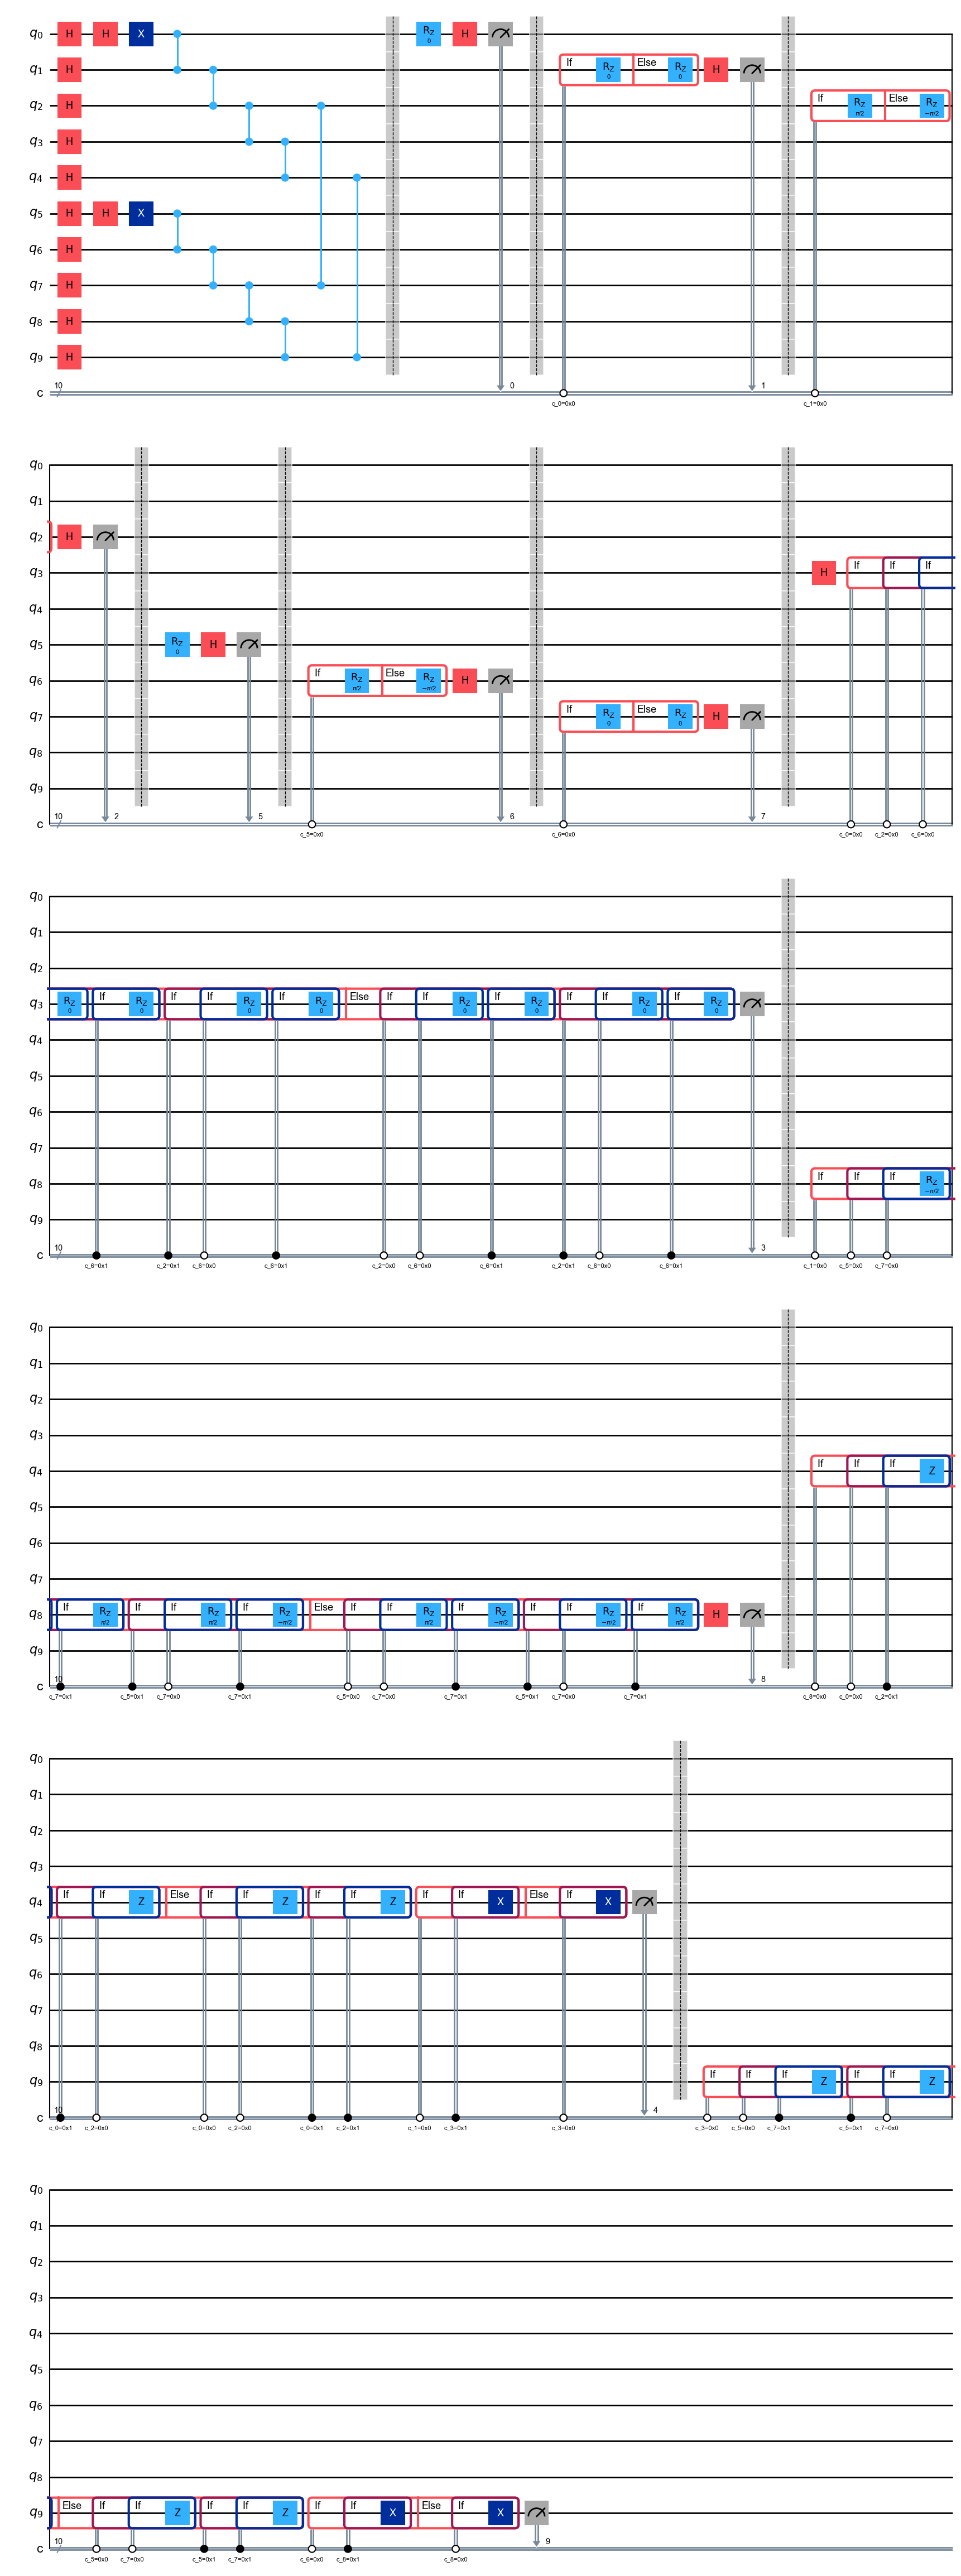

In [31]:
# Brickwork state preparation for a quantum circuit with 10 qubits and 10 classical bits
qc = QuantumCircuit(10, 10)

# Define classical registers for measurements
(c0, c1, c2, c3, c4, c5, c6, c7, c8, c9) = qc.clbits

# Define the measurement angles in the XY-plane of the Bloch sphere for each qubit.
# These angles correspond to the rotation angles used in the RZ gates before measurement.
# The angles determine how the qubits are rotated in preparation for measurement.

# Arbitrary unitary gate: (RZ(alpha0)Rx(alpha1)RZ(alpha2)) ⊗ (RZ(alpha5)Rx(alpha6)RZ(alpha7)).
# Phase gate: P(θ) = RZ(θ)Rx(0)RZ(0) = RZ(θ), as only the RZ rotation is applied.
# Hadamard gate (H): H = RZ(π/2)Rx(π/2)RZ(π/2), which prepares qubits in the superposition state.
# CNOT (CX) gate example: alpha0=0, alpha1=0, alpha2=π/2, alpha3=0, alpha5=0, alpha6=π/2, alpha7=0, alpha8=-π/2.

# This sequence implements rotations to create a CNOT gate structure.
# Measurement angles for individual qubits
alpha0 = 0        # Rotation angle for qubit 0
alpha1 = 0        # Rotation angle for qubit 1 (conditional on the result of c0)
alpha2 = np.pi/2  # Rotation angle for qubit 2 (conditional on the result of c1)
alpha3 = 0        # Rotation angle for qubit 3 (conditional on the XOR of c0, c2, and c6)
alpha5 = 0        # Rotation angle for qubit 5
alpha6 = np.pi/2  # Rotation angle for qubit 6 (conditional on the result of c5)
alpha7 = 0        # Rotation angle for qubit 7 (conditional on the result of c6)
alpha8 = -np.pi/2 # Rotation angle for qubit 8 (conditional on the XOR of c1, c5, and c7)


# Set qubits 0 and 5 to the |+⟩ state, then apply X gate to switch them to |1⟩
qc.h(0)
qc.h(5)

# Apply Hadamard gates to all qubits to create a superposition state |+> ⊗ 10
for i in range(10):
    qc.h(i)

# Apply X gates to qubits 0 and 5 to set them to |1⟩
qc.x(0)
qc.x(5)

# Apply CZ gates to create the brickwork entangled state
# Apply CZ between consecutive qubits for qubits 0 to 4 and 5 to 9
for i in range(0, 4):
    qc.cz(i, i + 1)

for i in range(5, 9):
    qc.cz(i, i + 1)

# Apply CZ gates between non-consecutive qubits to finalize entanglement
qc.cz(2, 7)
qc.cz(4, 9)

# Measurement on qubit 0 with a rotation in the xy-plane defined by alpha0
qc.barrier()
qc.rz(alpha0, 0)  # Rotate around Z-axis by angle alpha0
qc.h(0)           # Hadamard to prepare qubit for measurement
qc.measure(0, c0) # Measure qubit 0 and store result in classical bit c0

# Measurement on qubit 1 with a conditional rotation based on the result of c0
qc.barrier()
# Rotate by alpha1 if c0 == 0, otherwise rotate by -alpha1
with qc.if_test((c0, 0)) as else_:
    qc.rz(alpha1, 1)
with else_:
    qc.rz(-alpha1, 1)
qc.h(1)           # Hadamard gate to prepare qubit for measurement
qc.measure(1, c1) # Measure qubit 1 and store result in classical bit c1

# Measurement on qubit 2 with a conditional rotation based on the result of c1
qc.barrier()
# Rotate by alpha2 if c1 == 0, otherwise rotate by -alpha2
with qc.if_test((c1, 0)) as else_:
    qc.rz(alpha2, 2)
with else_:
    qc.rz(-alpha2, 2)
qc.h(2)           # Hadamard gate to prepare qubit for measurement
qc.measure(2, c2) # Measure qubit 2 and store result in classical bit c2

# Measurement on qubit 5 with rotation by angle alpha5
qc.barrier()
qc.rz(alpha5, 5)  # Rotate around Z-axis by alpha5
qc.h(5)           # Hadamard gate to prepare qubit for measurement
qc.measure(5, c5) # Measure qubit 5 and store result in classical bit c5

# Measurement on qubit 6 with a conditional rotation based on the result of c5
qc.barrier()
# Rotate by alpha6 if c5 == 0, otherwise rotate by -alpha6
with qc.if_test((c5, 0)) as else_:
    qc.rz(alpha6, 6)
with else_:
    qc.rz(-alpha6, 6)
qc.h(6)           # Hadamard gate to prepare qubit for measurement
qc.measure(6, c6) # Measure qubit 6 and store result in classical bit c6

# Measurement on qubit 7 with a conditional rotation based on the result of c6
qc.barrier()
# Rotate by alpha7 if c6 == 0, otherwise rotate by -alpha7
with qc.if_test((c6, 0)) as else_:
    qc.rz(alpha7, 7)
with else_:
    qc.rz(-alpha7, 7)
qc.h(7)           # Hadamard gate to prepare qubit for measurement
qc.measure(7, c7) # Measure qubit 7 and store result in classical bit c7

# Measurement on qubit 3 with conditional RZ rotations based on the XOR of c0, c2, and c6
qc.barrier()
qc.h(3)           # Hadamard gate before conditional rotations
# Apply rotations based on the XOR of c0, c2, and c6 for qubit 3
with qc.if_test((c0, 0)) as else_:
    with qc.if_test((c2, 0)):
        with qc.if_test((c6, 0)):
            qc.rz(alpha3, 3)
        with qc.if_test((c6, 1)):
            qc.rz(-alpha3, 3)
    with qc.if_test((c2, 1)):
        with qc.if_test((c6, 0)):
            qc.rz(-alpha3, 3)
        with qc.if_test((c6, 1)):
            qc.rz(alpha3, 3)
with else_:
    with qc.if_test((c2, 0)):
        with qc.if_test((c6, 0)):
            qc.rz(-alpha3, 3)
        with qc.if_test((c6, 1)):
            qc.rz(alpha3, 3)
    with qc.if_test((c2, 1)):
        with qc.if_test((c6, 0)):
            qc.rz(alpha3, 3)
        with qc.if_test((c6, 1)):
            qc.rz(-alpha3, 3)

qc.measure(3, c3) # Measure qubit 3 and store result in classical bit c3

# Measurement on qubit 8 with conditional RZ rotations based on the XOR of c1, c5, and c7
qc.barrier()
# Apply rotations based on the XOR of c1, c5, and c7 for qubit 8
with qc.if_test((c1, 0)) as else_:
    with qc.if_test((c5, 0)):
        with qc.if_test((c7, 0)):
            qc.rz(alpha8, 8)
        with qc.if_test((c7, 1)):
            qc.rz(-alpha8, 8)
    with qc.if_test((c5, 1)):
        with qc.if_test((c7, 0)):
            qc.rz(-alpha8, 8)
        with qc.if_test((c7, 1)):
            qc.rz(alpha8, 8)
with else_:
    with qc.if_test((c5, 0)):
        with qc.if_test((c7, 0)):
            qc.rz(-alpha8, 8)
        with qc.if_test((c7, 1)):
            qc.rz(alpha8, 8)
    with qc.if_test((c5, 1)):
        with qc.if_test((c7, 0)):
            qc.rz(alpha8, 8)
        with qc.if_test((c7, 1)):
            qc.rz(-alpha8, 8)

qc.h(8)           # Hadamard gate to prepare qubit for measurement
qc.measure(8, c8) # Measure qubit 8 and store result in classical bit c8

# Measurement on qubit 4 (output qubit) with Z and X compensations based on classical results
qc.barrier()

# Apply Z compensations based on XOR of c8, c0, and c2 for qubit 4
with qc.if_test((c8, 0)) as else_:
    with qc.if_test((c0, 0)):
        with qc.if_test((c2, 1)):
            qc.z(4)
    with qc.if_test((c0, 1)):
        with qc.if_test((c2, 0)):
            qc.z(4)
with else_:
    with qc.if_test((c0, 0)):
        with qc.if_test((c2, 0)):
            qc.z(4)
    with qc.if_test((c0, 1)):
        with qc.if_test((c2, 1)):
            qc.z(4)

# Apply X compensations based on XOR of c1 and c3 for qubit 4
with qc.if_test((c1, 0)) as else_:
    with qc.if_test((c3, 1)):
        qc.x(4)
with else_:
    with qc.if_test((c3, 0)):
        qc.x(4)

# Measure qubit 4 and store the result in classical bit c4
qc.measure(4, c4)

# Measurement on qubit 9 (output qubit) with Z and X compensations based on classical results
qc.barrier()

# Apply Z compensations based on XOR of c3, c5, and c7 for qubit 9
with qc.if_test((c3, 0)) as else_:
    with qc.if_test((c5, 0)):
        with qc.if_test((c7, 1)):
            qc.z(9)  # Apply Z if c3=0, c5=0, and c7=1
    with qc.if_test((c5, 1)):
        with qc.if_test((c7, 0)):
            qc.z(9)  # Apply Z if c3=0, c5=1, and c7=0
with else_:
    with qc.if_test((c5, 0)):
        with qc.if_test((c7, 0)):
            qc.z(9)  # Apply Z if c3=1, c5=0, and c7=0
    with qc.if_test((c5, 1)):
        with qc.if_test((c7, 1)):
            qc.z(9)  # Apply Z if c3=1, c5=1, and c7=1

# Apply X compensations based on XOR of c6 and c8 for qubit 9
with qc.if_test((c6, 0)) as else_:
    with qc.if_test((c8, 1)):
        qc.x(9)  # Apply X if c6=0 and c8=1
with else_:
    with qc.if_test((c8, 0)):
        qc.x(9)  # Apply X if c6=1 and c8=0

# Measure qubit 9 and store the result in classical bit c9
qc.measure(9, c9)

# Draw the quantum circuit
qc.draw('mpl')

In [32]:
# Execute the quantum circuit on a simulator
simulator = AerSimulator()  # Initialize the Aer simulator (which simulates a quantum device)

# Transpile the quantum circuit to optimize it for the simulator
compiled_circuit = transpile(qc, simulator)  # Transpile (optimize) the circuit for the specific backend

# Run the transpiled circuit with 10,000 shots (repetitions)
result = simulator.run(compiled_circuit, shots=10000).result()

# Get the measurement results (counts) from the simulation
counts = result.get_counts()  # This returns a dictionary where keys are bitstrings of measurement outcomes, and values are the count of occurrences

# Print the result counts
print(counts)  # Output the measurement results

{'0001111110': 56, '0100011101': 36, '0000110001': 34, '0101010000': 41, '0100111111': 42, '0000110111': 41, '0101010100': 37, '0100111011': 36, '0000011100': 38, '0001111001': 40, '0100011000': 49, '0010010100': 45, '0000111011': 52, '0110010110': 43, '0110111000': 54, '0011010001': 34, '0001010101': 34, '0101110100': 36, '0001111000': 29, '0100011001': 42, '0111011111': 49, '0110110100': 42, '0101111100': 34, '0001011011': 28, '0010110111': 40, '0101011001': 40, '0010111110': 53, '0101110001': 45, '0001010000': 37, '0011111110': 46, '0110011100': 47, '0010011101': 25, '0100010100': 42, '0001110101': 46, '0000111010': 44, '0111110100': 57, '0011111100': 42, '0101110000': 29, '0001010001': 36, '0010111101': 44, '0001110001': 28, '0100010000': 35, '0111011100': 44, '0110110001': 29, '0011010110': 42, '0001011101': 42, '0101111110': 23, '0010110001': 43, '0011011001': 29, '0110110000': 47, '0111011011': 30, '0110111111': 25, '0111010100': 59, '0000110110': 38, '0001111010': 38, '00111100

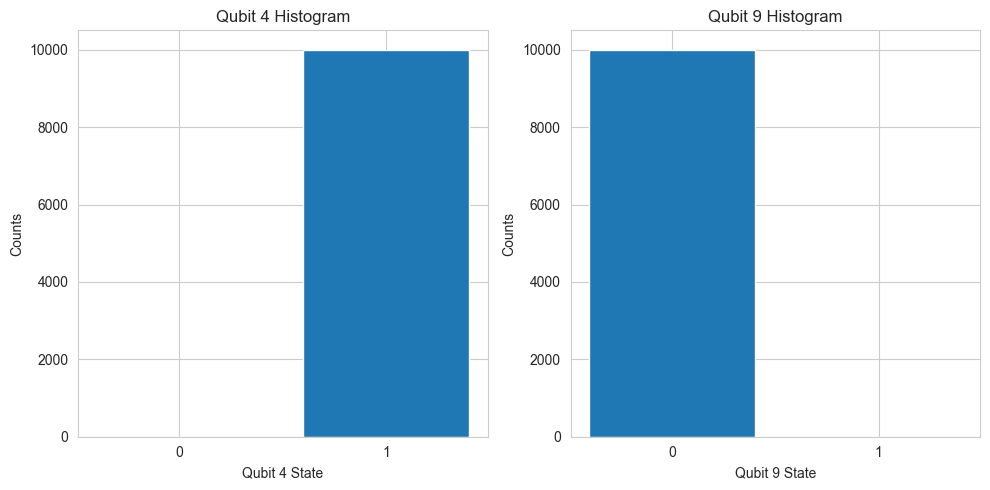

In [33]:
# Initialize empty lists to store the measurement outcomes (states) for qubit 4 and qubit 9, and their corresponding counts
qubit_4_states = []  # To store the measurement outcome of qubit 4 for each result
qubit_9_states = []  # To store the measurement outcome of qubit 9 for each result
count_values = []  # To store the count (how many times each outcome occurred)

# Process each entry in the 'counts' dictionary, where the key is the bitstring and the value is the count
for key, count in counts.items():
    key = key.replace(' ', '')  # Remove spaces from the bitstring (if any)
    
    # Extract the measurement outcomes for qubit 4 and qubit 9 from the bitstring:
    # - Qubit 4 corresponds to index 5 in the bitstring (6th position)
    # - Qubit 9 corresponds to index 0 in the bitstring (1st position)
    qubit_4_states.append(int(key[5]))  # Get the state of qubit 4 (0 or 1)
    qubit_9_states.append(int(key[0]))  # Get the state of qubit 9 (0 or 1)
    
    count_values.append(count)  # Add the count of occurrences for this bitstring

# Initialize two arrays to store the counts for qubit 4 and qubit 9 outcomes (either 0 or 1)
qubit_4_histogram = np.zeros(2)  # An array with two bins: one for qubit_4 = 0 and one for qubit_4 = 1
qubit_9_histogram = np.zeros(2)  # An array with two bins: one for qubit_9 = 0 and one for qubit_9 = 1

# Populate the histograms by summing the counts for each outcome (0 or 1) for both qubits
for q4, q9, count in zip(qubit_4_states, qubit_9_states, count_values):
    qubit_4_histogram[q4] += count  # Add the count to the appropriate bin for qubit 4 (0 or 1)
    qubit_9_histogram[q9] += count  # Add the count to the appropriate bin for qubit 9 (0 or 1)

# Plot the histograms
plt.figure(figsize=(10, 5))  # Create a figure with a size of 10x5 inches

# Qubit 4 Histogram
plt.subplot(1, 2, 1)  # Create a subplot (1 row, 2 columns, 1st plot)
plt.bar([0, 1], qubit_4_histogram)  # Plot the histogram for qubit 4 (with bars for 0 and 1 outcomes)
plt.xticks([0, 1], ['0', '1'])  # Set the x-axis labels to '0' and '1'
plt.xlabel('Qubit 4 State')  # Label the x-axis
plt.ylabel('Counts')  # Label the y-axis
plt.title('Qubit 4 Histogram')  # Set the title of the plot

# Qubit 9 Histogram
plt.subplot(1, 2, 2)  # Create the second subplot (1 row, 2 columns, 2nd plot)
plt.bar([0, 1], qubit_9_histogram)  # Plot the histogram for qubit 9 (with bars for 0 and 1 outcomes)
plt.xticks([0, 1], ['0', '1'])  # Set the x-axis labels to '0' and '1'
plt.xlabel('Qubit 9 State')  # Label the x-axis
plt.ylabel('Counts')  # Label the y-axis
plt.title('Qubit 9 Histogram')  # Set the title of the plot

# Display the plots neatly
plt.tight_layout()  # Adjust the layout to make sure the subplots don't overlap
plt.show()  # Show the plots